# monitor photom

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Download


In [2]:
/bin/rm -f pcad*fits aca*fits
download_chandra_obsid 11022 adat
mv -fv 11022/secondary/aspect/*adat* .
gunzip -f *fits.gz 



  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  adat     fits        2 Mb  ####################          < 1 s  41364.1 kb/s

'11022/secondary/aspect/pcadf383724410N003_adat71.fits.gz' -> './pcadf383724410N003_adat71.fits.gz'


## Merge files together (if necessary)

In [3]:
/bin/ls *adat71.fits > adat71.lis
dmmerge infile=@adat71.lis outfile=pcad_adat71.fits clob+

## Run monitor_photom

In [4]:
monitor_photom infile=pcad_adat71.fits outfile=monitor_lc.fits verbose=1 clob+

monitor_photom
          infile = pcad_adat71.fits
         outfile = monitor_lc.fits
      dark_ratio = 0.005
  min_dark_limit = 80
   min_dark_meas = 10
max_dither_motion = 10
         verbose = 1
         clobber = yes
            mode = ql

Filtering image data (cosmic ray removal)...
Stacking dark current data...
Average counts  (e-) = 29884.83665768194
Warm dark limit (e-) = 149.4241832884097
Warm pixel at CCD (row,col) = (-6,8)	 Dark current (e-) = 390.0
Warm pixel at CCD (row,col) = (-13,9)	 Dark current (e-) = 320.0
Warm pixel at CCD (row,col) = (-7,10)	 Dark current (e-) = 160.0
Warm pixel at CCD (row,col) = (-11,11)	 Dark current (e-) = 215.0
Warm pixel at CCD (row,col) = (-7,11)	 Dark current (e-) = 280.0
Warm pixel at CCD (row,col) = (-5,13)	 Dark current (e-) = 345.0
Warm pixel at CCD (row,col) = (-6,16)	 Dark current (e-) = 355.0
Warm pixel at CCD (row,col) = (-9,17)	 Dark current (e-) = 185.0
Warm pixel at CCD (row,col) = (-9,18)	 Dark current (e-) = 215.0


## Examine Results


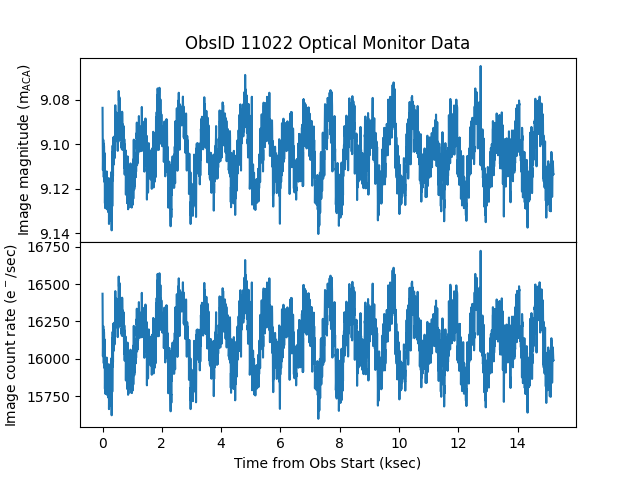

In [5]:
cat << EOM > c1.py
from pycrates import read_file
import matplotlib.pylab as plt

lc = read_file("monitor_lc.fits")
mag = lc.get_column("mag").values
toff = lc.get_column("time").values
toff = (toff-toff[0])/1000.0

plt.subplots(2, 1, sharex='col')
plt.subplots_adjust(hspace=0.0)
plt.subplot(2,1,1)

plt.plot(toff,mag, marker="None")
plt.ylabel(r"Image magnitude ($\mathregular{m_{ACA}}$)")
plt.title("ObsID 11022 Optical Monitor Data")
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
counts =  lc.get_column("count_rate").values
plt.plot(toff, counts, marker="None")
plt.ylabel(r"Image count rate ($\mathregular{e^-/sec}$)")
plt.xlabel("Time from Obs Start (ksec)")
plt.savefig("chips_01.png")
EOM

python c1.py
display < chips_01.png


## Check Freq

In [6]:
dmstat "monitor_lc.fits[cols counts]" | grep mean

   mean:	27347.435057 


In [7]:
dmtcalc monitor_lc.fits lc0.fits expr='c0=counts-27347.435057' clob+

In [8]:
apowerspectrum lc0.fits'[cols time,c0]' none powerspec.fits crop=yes clob+ 

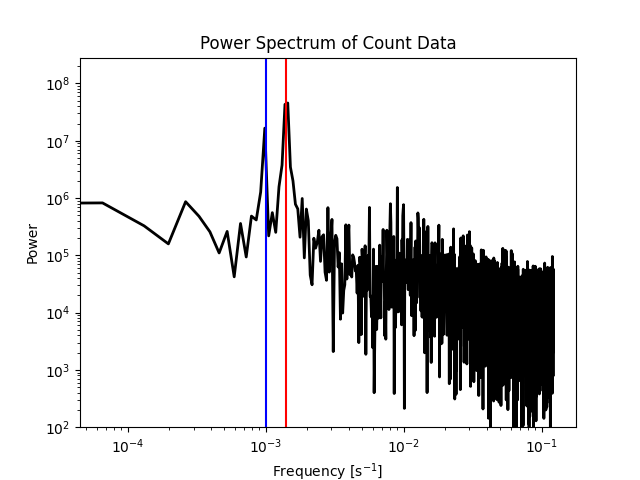

In [9]:
cat << EOM > c2.py
from pycrates import read_file
import matplotlib.pyplot as plt

psout = read_file("powerspec.fits")
freq = psout.get_column("frequency").values
pwr = psout.get_column("data").values

plt.plot(freq,pwr, marker="None", linewidth=2, color="black")
plt.xscale("log")
plt.yscale("log")
plt.ylim(bottom=100)
plt.axvline( 1.0/707.1, color="red")
plt.axvline( 1.0/1000.0, color="blue")
plt.xlabel(r"Frequency [$\mathregular{s^{-1}}$]")
plt.ylabel("Power")
plt.title("Power Spectrum of Count Data")
plt.savefig("chips_02.png")
EOM

python c2.py
display < chips_02.png

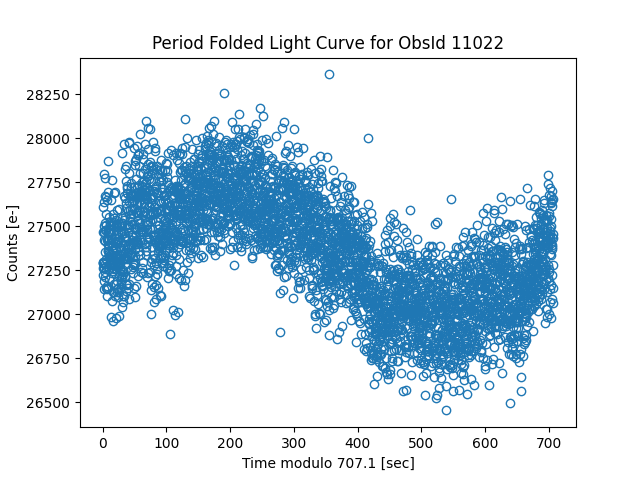

In [10]:
cat << EOM > c3.py
from pycrates import read_file
import matplotlib.pylab as plt
import numpy as np


tab = read_file("monitor_lc.fits")
tt = tab.get_column("time").values
cc = tab.get_column("counts").values
fold = np.mod( tt, 707.1 )

plt.plot(fold,cc,marker="o",linestyle="None",fillstyle="none")
plt.xlabel("Time modulo 707.1 [sec]")
plt.ylabel("Counts [e-]")
plt.title("Period Folded Light Curve for ObsId 11022")
plt.savefig("chips_03.png")
EOM

python c3.py
display < chips_03.png


---
## Problem cases


In [11]:
/bin/rm -rf 4924
download_chandra_obsid 4924 adat

dmmerge infile="4924/secondary/aspect/*adat71.fits.gz" outfile=pcad4924_adat71.fits clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  adat     fits        2 Mb  ####################          < 1 s  46110.5 kb/s
  adat     fits        2 Mb  ####################          < 1 s  55348.1 kb/s
  adat     fits        1 Mb  ####################          < 1 s  39852.6 kb/s
  adat     fits        1 Mb  ####################          < 1 s  33823.8 kb/s
  adat     fits      896 Kb  ####################          < 1 s  28366.5 kb/s
  adat     fits       11 Kb  ####################          < 1 s  1033.9 kb/s

      Total download size for ObsId 4924 = 8 Mb
      Total download time for ObsId 4924 = < 1 s



In [12]:
monitor_photom infile=pcad4924_adat71.fits \
  outfile=monitor4924_lc.fits clob+ verb=1

monitor_photom
          infile = pcad4924_adat71.fits
         outfile = monitor4924_lc.fits
      dark_ratio = 0.005
  min_dark_limit = 80
   min_dark_meas = 10
max_dither_motion = 10
         verbose = 1
         clobber = yes
            mode = ql

Filtering image data (cosmic ray removal)...
Stacking dark current data...
Average counts  (e-) = 2137.9961056552656
Warm dark limit (e-) = 80.0
Warm pixel at CCD (row,col) = (-18,10)	 Dark current (e-) = 85.0
Warm pixel at CCD (row,col) = (-17,11)	 Dark current (e-) = 325.0
Warm pixel at CCD (row,col) = (-11,11)	 Dark current (e-) = 615.0
Warm pixel at CCD (row,col) = (-15,12)	 Dark current (e-) = 105.0
Warm pixel at CCD (row,col) = (-8,16)	 Dark current (e-) = 115.0
Warm pixel at CCD (row,col) = (-10,17)	 Dark current (e-) = 105.0
Warm pixel at CCD (row,col) = (-17,19)	 Dark current (e-) = 170.0
Warm pixel at CCD (row,col) = (-14,20)	 Dark current (e-) = 130.0
Warm pixel at CCD (row,col) = (-13,20)	 Dark current (e-) = 175.0
Warm pixel

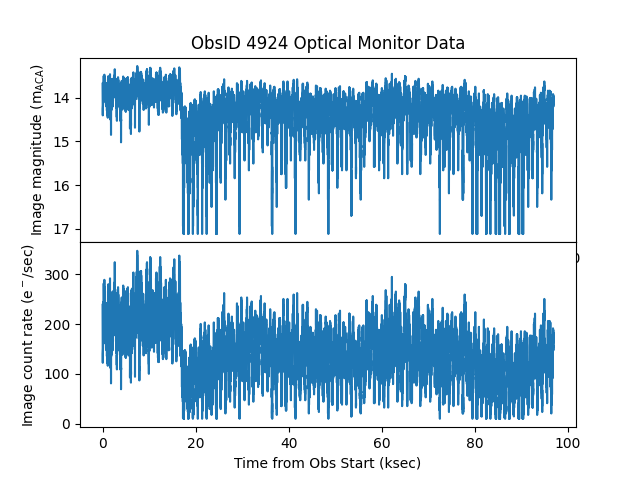

In [13]:
cat << EOM > c4.py
from pycrates import read_file
import matplotlib.pylab as plt

lc = read_file("monitor4924_lc.fits")
mag = lc.get_column("mag").values
toff = lc.get_column("time").values
toff = (toff-toff[0])/1000.0

plt.subplots(2, 1, sharex='col')
plt.subplots_adjust(hspace=0.0)
plt.subplot(2,1,1)

plt.plot(toff,mag, marker="None")
plt.ylabel(r"Image magnitude ($\mathregular{m_{ACA}}$)")
plt.title("ObsID 4924 Optical Monitor Data")
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
counts =  lc.get_column("count_rate").values
plt.plot(toff, counts, marker="None")
plt.ylabel(r"Image count rate ($\mathregular{e^-/sec}$)")
plt.xlabel("Time from Obs Start (ksec)")
plt.savefig("chips_04.png")
EOM

python c4.py
display < chips_04.png

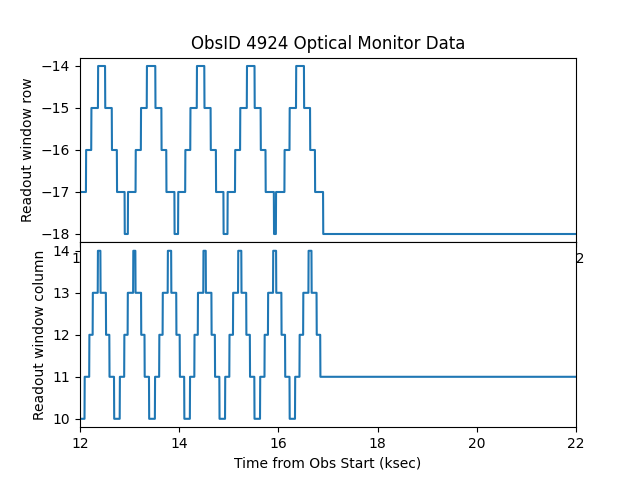

In [14]:
cat << EOM > c5.py
from pycrates import read_file
import matplotlib.pylab as plt

dat = read_file("pcad4924_adat71.fits")
toff = dat.get_column("time").values
row = dat.get_column("img_row0").values
col = dat.get_column("img_col0").values
toff = (toff-toff[0])/1000.0

plt.subplots(2, 1, sharex='col')
plt.subplots_adjust(hspace=0.0)
plt.subplot(2,1,1)

plt.plot(toff,row, marker="None")
plt.ylabel("Readout window row")
plt.title("ObsID 4924 Optical Monitor Data")
plt.xlim(12,22)

plt.subplot(2,1,2)
plt.plot(toff,col, marker="None")
plt.ylabel("Readout window column")
plt.xlabel("Time from Obs Start (ksec)")
plt.xlim(12,22)
plt.savefig("chips_05.png")
EOM

python c5.py
display < chips_05.png


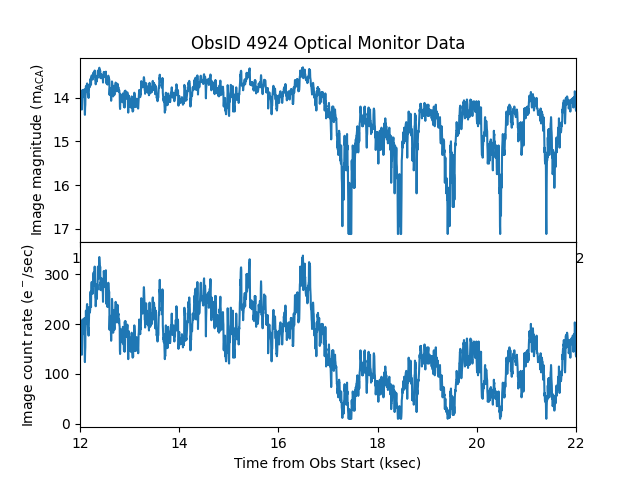

In [15]:
cat << EOM > c6.py
from pycrates import read_file
import matplotlib.pylab as plt

lc = read_file("monitor4924_lc.fits")
mag = lc.get_column("mag").values
toff = lc.get_column("time").values
toff = (toff-toff[0])/1000.0

plt.subplots(2, 1, sharex='col')
plt.subplots_adjust(hspace=0.0)
plt.subplot(2,1,1)

plt.plot(toff,mag, marker="None")
plt.ylabel(r"Image magnitude ($\mathregular{m_{ACA}}$)")
plt.title("ObsID 4924 Optical Monitor Data")
plt.gca().invert_yaxis()
plt.xlim(12,22)

plt.subplot(2,1,2)
counts =  lc.get_column("count_rate").values
plt.plot(toff, counts, marker="None")
plt.ylabel(r"Image count rate ($\mathregular{e^-/sec}$)")
plt.xlabel("Time from Obs Start (ksec)")
plt.xlim(12,22)
plt.savefig("chips_06.png")
EOM


python c6.py
display < chips_06.png


# Cleanup


In [16]:
/bin/rm -rf 11022 4924
/bin/rm -f pcadf383724410N003_adat71.fits pcad4924_adat71.fits pcad_adat71.fits